# Random Forrest - EXERCÍCIO EXTRA !!!

### Disciplina Inteligência Artificial

Neste exercício extra vamos utilizar Random Forrest para um problema de Regressão: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Aplique Random Forrest para prever o valor de vendas de acordo com os valores investidos em publicidade (TV, Radio e Newspaper). 

Compare o resultado com Regressão Linear Multivalorada e responda:

* Qual o melhor resultado obtido com Random Forrest e quais hiper-parâmetros foram utilizados?
* Comparado com o resultado de Regressão Linear, qual obteve melhor performance?

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

## Carregando o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Podemos também trabalhar com o Pandas
df = pd.read_csv('/content/Advertising.csv')

df.head()

## Explorando o Dataset

In [ ]:
# Distribuição do target
df['sales'].value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [ ]:
#convertendo valores float para inteiro
df['sales'] = df['sales'].astype(int)
df['TV'] = df['TV'].astype(int)
df['radio'] = df['radio'].astype(int)
df['newspaper'] =df['newspaper'].astype(int)


In [ ]:
df.dtypes

Unnamed: 0    int64
TV            int64
radio         int64
newspaper     int64
sales         int64
dtype: object

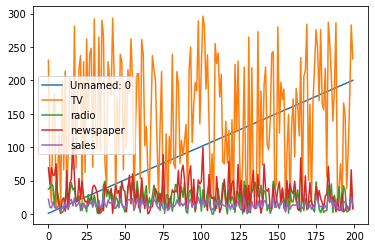

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

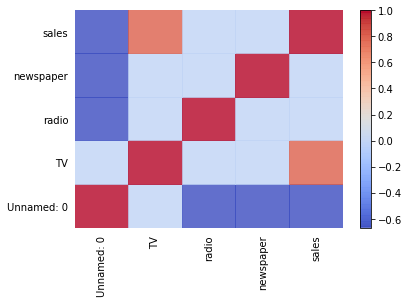

In [ ]:
# Vamos gerar a matriz de correlação entre as variáveis e a variável alvo
matriz_corr = df.corr()
observations = len(matriz_corr)
variables = matriz_corr.columns
visualize_correlation_matrix(matriz_corr, hurdle = 0.5)

Nos gráficos acima vemos a plotagem de todas as possíveis combinações entre as variáveis. 

In [ ]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,1:-1]
y = df['sales'].values


# Imprimindo os primeiros valores de X
X.head()

,TV,radio,newspaper
0,230,37,69
1,44,39,45
2,17,45,69
3,151,41,58
4,180,10,58


In [ ]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[22 10  9 18 12  7 11 13  4 10]


In [ ]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(200, 3)
(200,)


## Random Forrest (Floresta Aleatória)

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.4, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (120, 3)
y_train: (120,)
X_test: (80, 3)
y_test: (80,)


In [ ]:
%%time
# Utilizando Random Forrest (Floresta Aleatória)
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5, max_features='sqrt', min_samples_split=2)
rf.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score
#print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print()

# Medidas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))
print()


Accuracy: 0.25
Precision: 0.5149278499278499
Recall: 0.25
F1 Score: 0.28577090783612524

CPU times: user 168 ms, sys: 13.8 ms, total: 182 ms
Wall time: 179 ms


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Regressão Linear

In [ ]:
# Vamos agora imprimir um scatter plot entre RM e o resultado (target)
# Definindo o range dos valores de x e y
VAR = ['TV','radio','newspaper']
X_2 = X[VAR].values.reshape((len(df),3))
print(X_2.shape)


# Define os valores de X e y
num_observ = len(df)
X_1 = df[VAR].values.reshape((num_observ, 3))
y = df['sales'].values 

(200, 3)


In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1 , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)
print()

# Importando a biblioteca
from sklearn import linear_model
# Cria o objeto
lin_reg = linear_model.LinearRegression(copy_X=True, fit_intercept=bool, n_jobs=10, normalize=True)

# Treina o modelo - fit()
lin_reg.fit(X_train,y_train)


# Imprime os coeficientes
print (lin_reg.coef_)
print (lin_reg.intercept_)

print()
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

print()
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))

X_train: (140, 3)
y_train: (140,)
X_test: (60, 3)
y_test: (60,)

[0.04760398 0.18299409 0.00757449]
2.219286806831656

Shape y_pred: (60,)

Mean Squared Error (MSE): 2.7800221886833953
Mean Absolute Error (MAE): 1.286490027022714
Score R2: 0.861746315248449


O modelo Random Forrest teve o pior desempenho em comparação ao modelo de regressão linear para esse dataset.

Realizamos varios atualizações dos hiper-parâmetros e para o modelo Random Forrest ficou como: teste_size=0.4, max_depth=5 e para os demais hiper-parâmetros como default.

O modelo de Regressão Linear os melhores hiper-parâmetros que definiu para uma melhor acuracia: test_size=0.3, copy_X=True, fit_intercept=bool, n_jobs=10, normalize=True.


Modelo | ....
--- | ------
Random Forrest | Accuracy: 0.25
Regressão Linear | Score R2: 0.861746315248449